In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sample_data
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from functools import partial
%matplotlib inline

In [3]:
schools = pd.read_csv('/content/school_data.csv')

In [4]:
schools.head()

,School,School ID,Board,Board ID,Num students,Level 1 (%),Level 2 (%),Level 3 (%),Level 4 (%),Num F,Num M,Num responses
0,Agincourt CI,890723,Toronto DSB,66052,263,1,7,73,18,138,125,237
1,Albert Campbell CI,890880,Toronto DSB,66052,250,6,10,70,13,116,134,182
2,Applewood Heights SS,892203,Peel District School Board,66125,184,8,11,74,4,89,95,172
3,Birchmount Park CI,895016,Toronto DSB,66052,127,6,23,66,2,53,74,116
4,Bramalea SS,895920,Peel District School Board,66125,165,9,18,68,4,67,98,114


In [5]:
attitudes = pd.read_csv('/content/response_data.csv')

In [6]:
attitudes.head()

,School ID,Q1(%),Q2(%),Q3(%),Q4(%),Q5(%),Q6(%),Q7(%),Q8(%),Q9(%),Q10(%),Q11(%)
0,890723,43,47,40,27,69,32,59,32,61,64,59
1,890880,60,48,38,46,72,40,66,48,58,63,57
2,892203,60,52,37,38,75,23,65,34,57,62,58
3,895016,46,47,38,39,59,19,68,28,48,53,54
4,895920,54,49,39,36,70,22,72,35,53,64,61


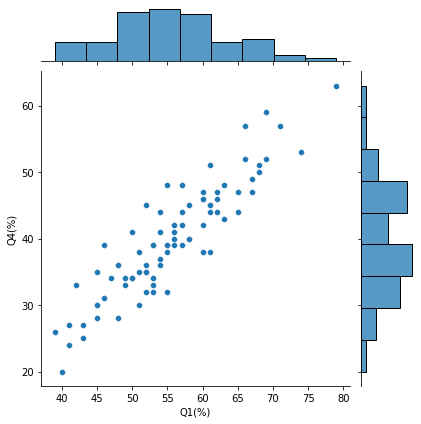

In [7]:
sns.jointplot(x="Q1(%)", y="Q4(%)", data=attitudes);

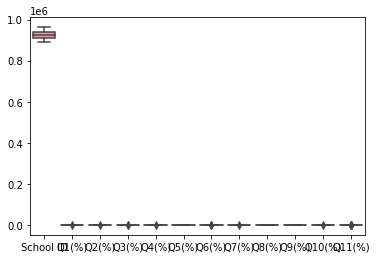

In [8]:
sns.boxplot(data=attitudes);

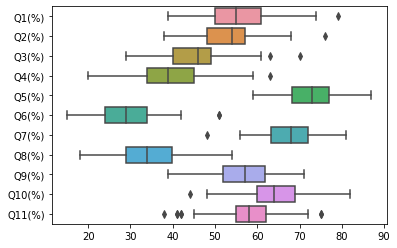

In [9]:
sns.boxplot(data=attitudes.drop(['School ID'],1), orient = "h");

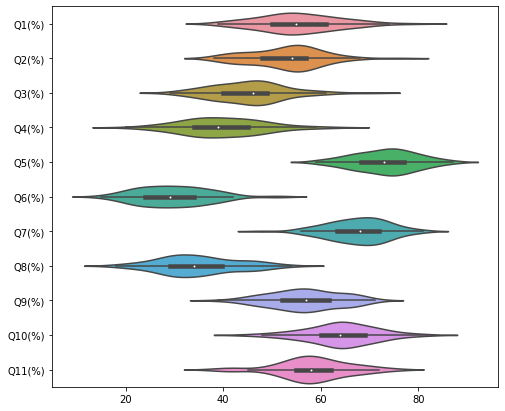

In [10]:
plt.figure(figsize=(8,7));
sns.violinplot(data=attitudes.drop(['School ID'],1), orient = "h");


In [11]:
all_info = schools.merge(attitudes, on = "School ID").drop(['School', 'Board ID', 'Num responses'],1)

In [12]:
all_info.head()

,School ID,Board,Num students,Level 1 (%),Level 2 (%),Level 3 (%),Level 4 (%),Num F,Num M,Q1(%),Q2(%),Q3(%),Q4(%),Q5(%),Q6(%),Q7(%),Q8(%),Q9(%),Q10(%),Q11(%)
0,890723,Toronto DSB,263,1,7,73,18,138,125,43,47,40,27,69,32,59,32,61,64,59
1,890880,Toronto DSB,250,6,10,70,13,116,134,60,48,38,46,72,40,66,48,58,63,57
2,892203,Peel District School Board,184,8,11,74,4,89,95,60,52,37,38,75,23,65,34,57,62,58
3,895016,Toronto DSB,127,6,23,66,2,53,74,46,47,38,39,59,19,68,28,48,53,54
4,895920,Peel District School Board,165,9,18,68,4,67,98,54,49,39,36,70,22,72,35,53,64,61


In [14]:
all_rearranged = pd.melt(all_info, id_vars=["School ID", "Board","Num students", "Level 1 (%)","Level 2 (%)", 
                                            "Level 3 (%)","Level 4 (%)", "Num F", "Num M" ], var_name="Question")

In [15]:
all_rearranged.head()

,School ID,Board,Num students,Level 1 (%),Level 2 (%),Level 3 (%),Level 4 (%),Num F,Num M,Question,value
0,890723,Toronto DSB,263,1,7,73,18,138,125,Q1(%),43
1,890880,Toronto DSB,250,6,10,70,13,116,134,Q1(%),60
2,892203,Peel District School Board,184,8,11,74,4,89,95,Q1(%),60
3,895016,Toronto DSB,127,6,23,66,2,53,74,Q1(%),46
4,895920,Peel District School Board,165,9,18,68,4,67,98,Q1(%),54


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use s

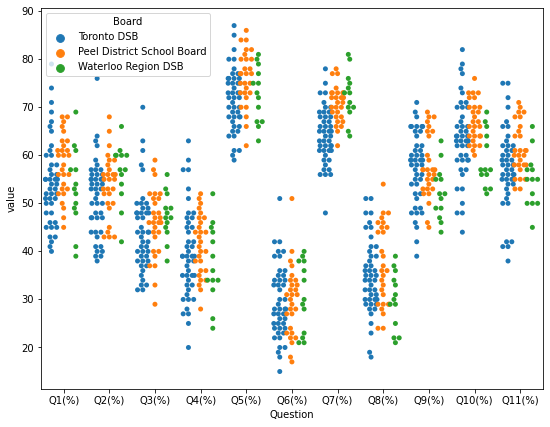

In [16]:
plt.figure(figsize=(9,7));
sns.swarmplot(x="Question", y ="value", data=all_rearranged, hue="Board", split = True);

In [17]:
all_rearranged["risk"] = np.where(all_rearranged['Level 1 (%)'] + all_rearranged['Level 2 (%)'] > 30, 'high', 'low')

In [18]:
all_rearranged.head()

,School ID,Board,Num students,Level 1 (%),Level 2 (%),Level 3 (%),Level 4 (%),Num F,Num M,Question,value,risk
0,890723,Toronto DSB,263,1,7,73,18,138,125,Q1(%),43,low
1,890880,Toronto DSB,250,6,10,70,13,116,134,Q1(%),60,low
2,892203,Peel District School Board,184,8,11,74,4,89,95,Q1(%),60,low
3,895016,Toronto DSB,127,6,23,66,2,53,74,Q1(%),46,low
4,895920,Peel District School Board,165,9,18,68,4,67,98,Q1(%),54,low


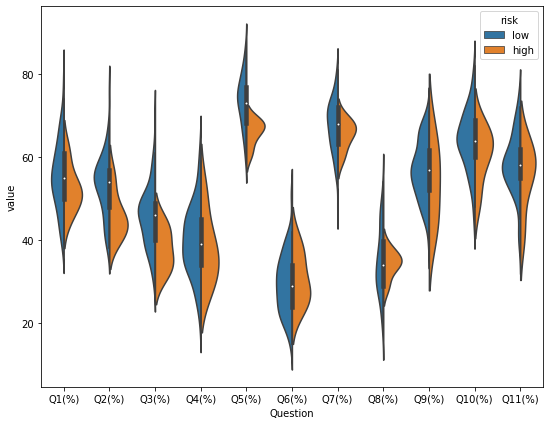

In [19]:
plt.figure(figsize=(9,7));
sns.violinplot(x="Question", y ="value", data=all_rearranged, hue="risk", split = True);

In [20]:
compare = all_info.drop(['School ID','Board', 'Num students', 'Level 2 (%)', 'Level 3 (%)', 'Level 4 (%)', 'Num M', 'Num F'],1);
calc = partial(pearsonr,compare['Level 1 (%)'])

In [21]:
compare.apply(calc)

,Level 1 (%),Q1(%),Q2(%),Q3(%),Q4(%),Q5(%),Q6(%),Q7(%),Q8(%),Q9(%),Q10(%),Q11(%)
0,1.0,-0.151177,-0.343197,-0.456893,-0.084684,-0.365449,-0.143107,-0.049277,0.067187,-0.212092,-0.210243,-0.212492
1,0.0,0.164699,0.001217,0.000010,0.438203,0.000540,0.188685,0.652307,0.538790,0.049944,0.052021,0.049504


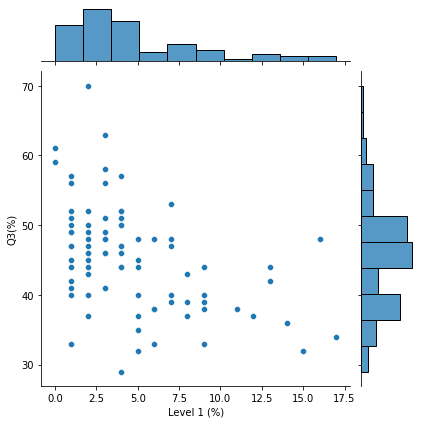

In [22]:
sns.jointplot(x="Level 1 (%)", y="Q3(%)", data=all_info);